### kNN算法概述
kNN算法(kNN,k-NearestNeighbor)也称k-近邻算法,其采用测量不同特征值之间的距离方法进行进行分类.思想很简单,近朱者赤近墨者黑

k是指从样本数据集中选择前k个最相似的数据

优点:精度高,对异常值不敏感,无数据输入假定

缺点:计算复杂度高,空间复杂度高

适用数据范围:数值型和标称型

In [44]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [45]:
# 实现我们自己的 kNN
# 创建简单测试用例
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 分为两类,0和1

# 构建训练数据,转成numpy.ndarray类型
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [46]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [47]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

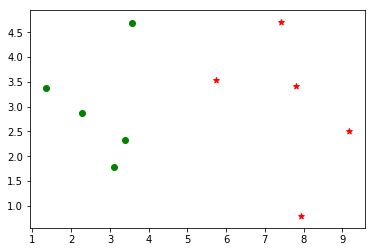

In [48]:
# 绘制测试数据的散点图
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g',marker='o')  # 绘制分类为0的散点图
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r',marker='*')  # 绘制分类为1的散点图
plt.show()

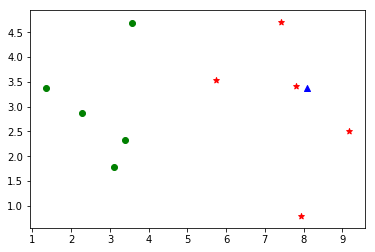

In [49]:
# 测试给定的点,绘制散点图,初步判读其分布在哪个区域
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1], color='g',marker='o')  # 绘制分类为0的散点图
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='r',marker='*')  # 绘制分类为1的散点图
plt.scatter(x[0], x[1], color='b', marker='^')  # 据图,初步判断其属于1类

plt.show()

In [50]:
from math import sqrt
# 接下来实现一个自己的kNN算法来测试判断是否正确
distances = []
distances = [sqrt(np.sum((x_train_i - x)**2)) for x_train_i in X_train]  # 计算点之间的距离
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [51]:
# 找出距离前6近的值,试试结果
np.argsort(distances)[:6]  # 返回这6个值的下标

array([8, 7, 5, 6, 9, 3], dtype=int64)

In [56]:
# 假设k=6,对比找出这些最近距离在y_train训练数据集中分类的情况
nearest = np.argsort(distances)
k = 6
topK_y = [y_train[near] for near in nearest[:k]]
topK_y  # 发现前5个都属于1分类,证明判断是正确的,人类直观判断

[1, 1, 1, 1, 1, 0]

In [53]:
# 得让计算机来判断,通过'投票(统计)'来得出结论
votes = Counter(topK_y)
print(type(votes))
votes  # 返回统计视图, 数据集是一个字典

<class 'collections.Counter'>


Counter({1: 5, 0: 1})

In [54]:
votes.most_common(1)  # 找出最受欢迎的一个结果

[(1, 5)]

In [55]:
predict_y = votes.most_common(1)[0][0]  # 输出预测结果
predict_y

1